# 11. NumPy (Numerical Python)

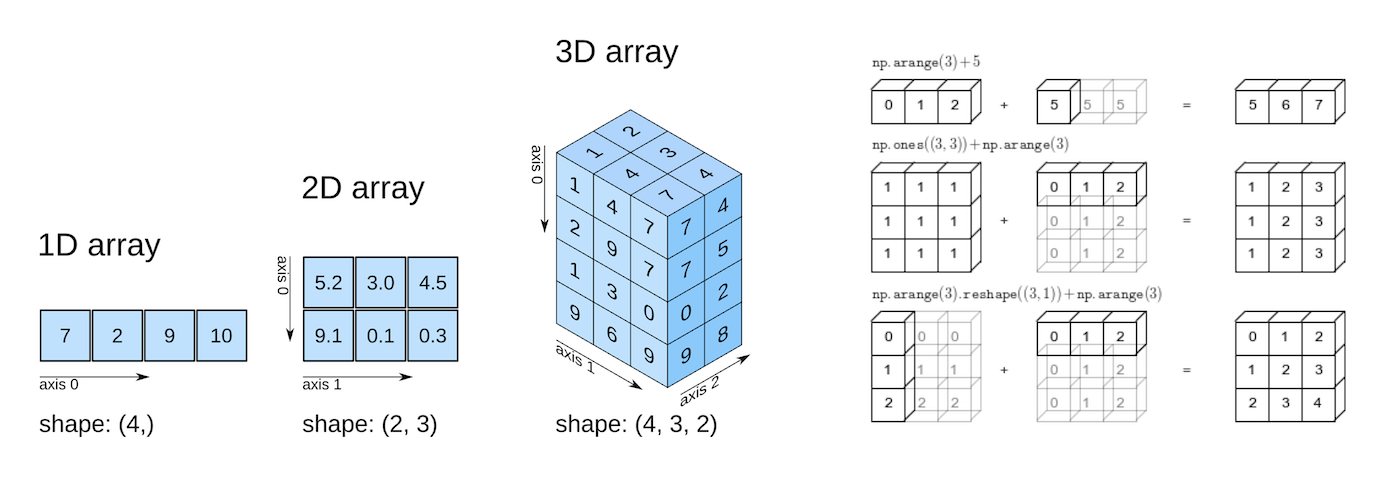

In [7]:
from IPython.display import Image
Image(filename='image/numpy01.png', width=2000)

In [8]:
!python --version

Python 3.12.9


In [ ]:
!python -m pip list

In [ ]:
!python -m pip install numpy

### 1. NumPy 소개

In [127]:
# numpy01.py
# NumPy: 대규모 배열 및 행렬 연산을 효율적으로 수행할 수 있는 파이썬 라이브러리

In [1]:
# NumPy 불러오기 
import numpy as np

#  [Python 리스트와 NumPy 배열의 성능 비교] 
import time 
# (1) Python 리스트로 백만 개의 숫자 생성 및 덧셈 수행 
list1 = list(range(1000000)) 
list2 = list(range(1000000)) 
start = time.time()  # 현재 시간 저장 (시작 시간) 

# (2)리스트 간 요소별 덧셈 수행 (zip을 통해 두 리스트의 각 요소를 짝지음) 
result_list = [x + y for x, y in zip(list1, list2)] 
end = time.time()  # 끝난 시간 저장 
print("Python List 연산 시간:", end - start) 

# (3) NumPy 배열로 같은 작업 수행 
arr1 = np.arange(1000000)  # 0 부터 999999까지의 정수 배열 생성 
arr2 = np.arange(1000000) 
start = time.time()  # 시작 시간

# (4) NumPy 배열은 벡터화된 연산을 지원하여 훨씬 빠른 속도로 처리됨 
result_arr = arr1 + arr2
end = time.time()
print("NumPy Array 연산 시간:", end - start)

Python List 연산 시간: 0.07612299919128418
NumPy Array 연산 시간: 0.002296924591064453


### 2. 배열 생성 및 속성

In [129]:
# numpy02.py
# 배열 생성 및 속성
# np.array - NumPy의 핵심 객체, 벡터 및 행렬 표현이 가능
# 속성을 통해 배열 구조를 쉽게 파악할 수 있음
# 배열 초기화 함수들을 통해 손쉽게 데이터를 생성할 수 있음

In [130]:
# 1. 배열 생성
a = np.array([1, 2, 3])
print("1 차원 배열:")
print(f"{a}\n")
b = np.array([[1, 2, 3], [4, 5, 6]])
print("2 차원 배열:")
print(f"{b}")

1 차원 배열:
[1 2 3]

2 차원 배열:
[[1 2 3]
 [4 5 6]]


In [2]:
# 2. 배열의 주요 속성 확인
b = np.array([[1, 2, 3], [4, 5, 6]])
print("차원 수 (ndim):", b.ndim) # 배열의 차원 수
print("배열 모양 (shape):", b.shape) # 각 차원의 크기 (행, 열)
print("데이터 타입 (dtype):", b.dtype) # 배열 요소의 자료형
print("요소 개수 (size):", b.size) # 전체 요소 수
print("요소 하나의 크기 (itemsize):", b.itemsize, "bytes") # 하나의 요소가 차지하는 메모리 크기

차원 수 (ndim): 2
배열 모양 (shape): (2, 3)
데이터 타입 (dtype): int64
요소 개수 (size): 6
요소 하나의 크기 (itemsize): 8 bytes


In [132]:
# 3. 다양한 초기화 배열 생성
zeros = np.zeros((2, 3)) # 0으로 채워진 2행 3열 배열
ones = np.ones((2, 3)) # 1로 채워진 배열
full = np.full((2, 3), 7) # 7로 채워진 배열
eye = np.eye(3) # 단위 행렬 (3x3)
rand = np.random.rand(2, 2) # 0~1 사이 난수로 채운 2x2 배열
print("0 배열:")
print(f"{zeros}\n")
print("1 배열:")
print(f"{ones}\n")
print("7 배열:")
print(f"{full}\n")
print("단위 행렬:")
print(f"{eye}\n")
print("난수 배열:")
print(f"{rand}")

0 배열:
[[0. 0. 0.]
 [0. 0. 0.]]

1 배열:
[[1. 1. 1.]
 [1. 1. 1.]]

7 배열:
[[7 7 7]
 [7 7 7]]

단위 행렬:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

난수 배열:
[[0.09467197 0.32581531]
 [0.56010215 0.0290974 ]]


In [133]:
# 4. arange 와 linspace
arr1 = np.arange(0, 10, 2) # 0부터 10 전 까지 2씩 증가
arr2 = np.linspace(0, 1, 5) # 0부터 1 까지 균등 간격으로 5개
print("arange 배열:", arr1)
print("linspace 배열:", arr2)

arange 배열: [0 2 4 6 8]
linspace 배열: [0.   0.25 0.5  0.75 1.  ]


In [144]:
# 5. reshape
reshaped = np.arange(12).reshape(3, 4) # 0~11까지 3행 4열로 변경
print("reshape 결과:")
print(reshaped)

reshape 결과:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


### 3. 배열 연산 기초

In [135]:
# numpy03.py
# 배열 연산 기초
# NumPy 배열은 사칙연산, 스칼라연산, 브로드캐스팅, 비교 및 논리연산 등을 매우 효율적으로 수행 가능
# 복잡한 수학적 처리를 간단한 코드로 처리할 수 있음
# 연산 결과는 벡터화되어 반복문 없이도 대규모 연산이 빠르게 수행됨

In [136]:
# 1. 기본 사칙연산
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print("덧셈:", a + b) 
print("뺄셈:", a - b)
print("곱셈:", a * b)
print("나눗셈:", a / b)

덧셈: [5 7 9]
뺄셈: [-3 -3 -3]
곱셈: [ 4 10 18]
나눗셈: [0.25 0.4  0.5 ]


In [137]:
# 2. 스칼라연산 (스칼라 값과의 연산)
# scalar: 4, 20, ...
a = np.array([1, 2, 3])
print("a * 4:", a * 4) # 배열의 모든 요소에 4를 곱함
print("a + 20:", a + 20) # 배열의 모든 요소에 20을 더함

a * 4: [ 4  8 12]
a + 20: [21 22 23]


In [138]:
# 3. 브로드캐스팅 (크기가 다른 배열 간 연산산)
A = np.array([[1, 2, 3], [4, 5, 6]]) # 2x3 행렬
B = np.array([1, 0, 1]) # 1x3 벡터
print("브로드캐스팅 결과:")
print(A + B) # B가 A에 맞춰 자동으로 확장되어 연산됨

브로드캐스팅 결과:
[[2 2 4]
 [5 5 7]]


In [139]:
# 4. 비교 연산
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print("a > 2:", a > 2)
print("a == 5:", a == 5)

a > 2: [False False  True]
a == 5: [False False False]


In [140]:
# 5. 논리 연산
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
cond1 = a > 1
cond2 = b < 6
print("조건 1:", cond1)
print("조건 2:", cond2)
print("AND 연산:", np.logical_and(cond1, cond2)) # 두 조건 모두 참인 경우 True
print("OR 연산:", np.logical_or(cond1, cond2)) # 하나라도 참이면 True

조건 1: [False  True  True]
조건 2: [ True  True False]
AND 연산: [False  True False]
OR 연산: [ True  True  True]


In [141]:
# 6. 집계 함수
arr = np.array([[1, 2, 3], [4, 5, 6]])
print("전체 합계:", np.sum(arr))
print("행별 합계:", np.sum(arr, axis=1)) # 각 행의 합
print("열별 합계:", np.sum(arr, axis=0)) # 각 열의 합

전체 합계: 21
행별 합계: [ 6 15]
열별 합계: [5 7 9]


### 4. Indexing & Slicing

In [ ]:
# numpy04.py
# Indexing(인덱싱): 배열의 특정 위치 값 조회
# slicing(슬라이싱): 범위를 지정하여 배열 일부 추출
# Bollean Indexing(조건 필터링): 조건을 만족하는 요소만 추출
# Fancy Indexing(팬시 인덱싱): 원하는 인덱스들을 배열로 전달하여 조회 또는 수정

In [145]:
# 1. 인덱싱 - 특정 위치의 요소를 조회
arr = np.array([10, 20, 30, 40, 50])
print("첫 번째 요소:", arr[0]) # 10
print("마지막 요소:", arr[-1]) # 50

첫 번째 요소: 10
마지막 요소: 50


In [147]:
# 2. 2차원 배열 인덱싱
arr2d = np.array([[1, 2, 3], [4, 5, 6]])
print("첫 행:", arr2d[0]) # [1 2 3]
print("두 번째 행, 세 번째 열:", arr2d[1, 2]) # 6

첫 행: [1 2 3]
두 번째 행, 세 번째 열: 6


In [148]:
# 3. 슬라이싱 - 특정 구간의 요소를 잘라냄
arr = np.array([10, 20, 30, 40, 50])
print("두 번째부터 네 번째까지:", arr[1:4]) # [20 30 40]

두 번째부터 네 번째까지: [20 30 40]


In [150]:
# 4. 2차원 배열 슬라이싱
arr2d = np.array([[1, 2, 3], [4, 5, 6]])
print("모든 행, 첫 번째 열:", arr2d[:, 0]) # 첫 번째 열만 추출
print("첫 번째 행, 두 번째 이후 열:", arr2d[0, 1:]) # [2 3]

모든 행, 첫 번째 열: [1 4]
첫 번째 행, 두 번째 이후 열: [2 3]


In [151]:
# 5. 조건 필터링
arr = np.array([10, 15, 20, 25, 30])
cond = arr > 20
print("20보다 큰 값들:", arr[cond]) # [25 30]

20보다 큰 값들: [25 30]


In [152]:
# 6. 조건 필터링 한 줄로
arr = np.array([10, 15, 20, 25, 30])
print("20보다 큰 값들(한 줄 표현):", arr[arr > 20])

20보다 큰 값들(한 줄 표현) [25 30]


In [154]:
# 7. 팬시 인덱싱
arr = np.array([10, 15, 20, 25, 30])
idx = [0, 2, 4] # 가져오고 싶은 인덱스 리스트
print("0, 2, 4 번째 값:", arr[idx]) # [10 20 30]
print("0, 2, 4 번째 값:", arr[[0, 2, 4]]) # [10 20 30]

0, 2, 4 번째 값: [10 20 30]
0, 2, 4 번째 값: [10 20 30]


In [155]:
# 8. 배열 값 변경
arr = np.array([10, 15, 20, 25, 30])
arr[0] = 100
print("첫 번째 값 변경 후:", arr)

첫 번째 값 변경 후: [100  15  20  25  30]


In [158]:
# 9. 다중 인덱싱으로값 변경
arr2d = np.array([[1, 2, 3], [4, 5, 6]])
arr2d[1, 2] = 99
print("2차원 배열 값 변경:")
print(arr2d)

[1 2 3]
2차원 배열 값 변경:
[[ 1  2  3]
 [ 4  5 99]]


### 5. 배열 변형

In [ ]:
# numpy05.py
# reshape: 배열의 구조를 바꿈 (요소 개수는 유지)
# flatten: 다차원 배열을 1차원으로 평탄화
# transpose: 행과 열을 교환
# concatenate: 배열을 이어 붙임 (행/열 방향)
# split: 배열을 일정 간격으로 나눔
# hstack/vstack: 수평/수직으로 배열을 쌓음음

In [160]:
# 1. 배열 형태 변경: reshape()
arr = np.arange(12) # 0~11까지 1차원 배열 생성
reshaped = arr.reshape((3, 4)) # 3행 4열, 2차원 배열로 변형
print("reshape 이전:")
print(f"{arr}\n")
print("reshape 결과:")
print(reshaped)

reshape 이전:
[ 0  1  2  3  4  5  6  7  8  9 10 11]

reshape 결과:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [162]:
# 2. 다차원 배열 평탄화: flatten()
arr = np.arange(12)
reshaped = arr.reshape((3, 4))
flattened = reshaped.flatten()
print("flatten 이전:")
print(f"{reshaped}\n")
print("flatten 결과:")
print(flattened)

flatten 이전:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

flatten 결과:
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [164]:
# 3. 행과 열 뒤바꾸기: transpose
arr = np.arange(12)
reshaped = arr.reshape((3, 4))
transposed = reshaped.T
print("transpose 이전:")
print(f"{reshaped}\n")
print("transpose 결과:")
print(transposed)

transpose 이전:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

transpose 결과:
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [184]:
# 4. 배열 합치기: concatenate()
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
# axis=0: 행 방향으로 붙이기 (열 수가 동일해야 함) / [a, a, a], a 개수 = 열 수
concat_axis0 = np.concatenate((a, b), axis=0)
print("행 방향으로 합치기:")
print(f"{concat_axis0}\n")

# axis=1: 열 방향으로 붙이기 (행 수가 동일해야 함) / [[], []], 내부 [] 개수 = 행 수
a2 = np.array([[1], [2]])
b2 = np.array([[3, 3, 3], [4, 4, 4]])
concat_axis1 = np.concatenate((a2, b2), axis=1)
print("열 방향으로 합치기:")
print(concat_axis1)

행 방향으로 합치기:
[[1 2]
 [3 4]
 [5 6]]

열 방향으로 합치기:
[[1 3 3 3]
 [2 4 4 4]]


In [175]:
# 5. 배열 분할: split()
x = np.array([1, 2, 3, 4, 5, 6])
split_arr = np.split(x, 3) # 3개로 분할
print("분할 결과", split_arr)

분할 결과 [array([1, 2]), array([3, 4]), array([5, 6])]


In [188]:
# 6. 수평, 수직으로 쌓기: hstack(), vstack()
a2 = np.array([[1], [2]])
b2 = np.array([[3], [4]])
hstacked = np.hstack((a2, b2)) # 열 방향
vstacked = np.vstack((a2, b2)) # 행 방향
print("hstack 결과:")
print(f"{hstacked}\n")
print("vstack 결과:")
print(vstacked)

hstack 결과:
[[1 3]
 [2 4]]

vstack 결과:
[[1]
 [2]
 [3]
 [4]]


### 6. 수학 및 통계 함수

In [ ]:
# numpyt06.py
# 수학 함수: sum, prod, cumsum, cumprod 등 기본적인 수치 연산
# 통계 함수: mean, median, std, var 등을 통해 데이터 분포 이해 가능
# np.srot, np.argsort 를 통해 데이터 정렬과 순위 파악 가능
# 머신러닝, 통계 분석, 금융 모델링 등 다양한 분야에서 유용하게 활용됨

In [189]:
# 1. 기초 수학 함수
arr = np.array([1, 2, 3, 4, 5])
print("합계:", np.sum(arr)) # 모든 요소의 합
print("누적합:", np.cumsum(arr)) # 누적합
print("곱:", np.prod(arr)) # 모든 요소의 곱
print("누적곱:", np.cumprod(arr)) # 누적곱

합계: 15
누적합: [ 1  3  6 10 15]
곱: 120
누적곱: [  1   2   6  24 120]


평균: 3.0
중앙값: 3.0


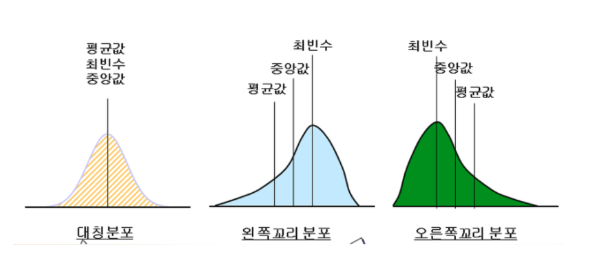

In [209]:
# 2. 평균 및 중앙값
arr = np.array([1, 2, 3, 4, 5])
print("평균:", np.mean(arr)) # 평균
print("중앙값:", np.median(arr)) # 중앙값

from IPython.display import Image
Image(filename='image/numpy02.png', width=2000)

In [196]:
# 3. 분산 및 표준편차
# 분산 공식
# 1. 각 값에서 평균을 뺌 = 편차 ex) 1-(1+2+3+4+5) / 5, 2-(1+2+3+4+5) / 5, ...
# 2. 그 편차를 제곱함 ex) (1-3)^2, (2-3)^2, ...
# 3. 그 제곱값들의 평균을 냄 = 분산
# (1) [-2, -1, 0, 1, 2]
# (2) [4, 1, 0, 1, 4]
# (3) (4+1+0+1+4) / 5 = 2
# 분산 = 2

# 표준 편차 공식
# 표준편차 = √(분산)
arr = np.array([1, 2, 3, 4, 5])
print("분산:", np.var(arr)) # 분산
print("표준편차:", np.std(arr)) # 표준편차

분산: 2.0
표준편차: 1.4142135623730951


In [197]:
# 4. 최소/최대 및 위치
arr = np.array([1, 2, 3, 4, 5])
print("최소값:", np.min(arr))
print("최대값:", np.max(arr))
print("최소값 위치:", np.argmin(arr)) # 최소값의 인덱스
print("최대값 위치:", np.argmax(arr)) # 최대값의 인덱스

최소값: 1
최대값: 5
최소값 위치: 0
최대값 위치: 4


In [200]:
# 5. 정렬 및 순위
unsorted = np.array([3, 1, 4, 5, 2])
sorted_arr = np.sort(unsorted)
indices = np.argsort(unsorted)
print("정렬된 배열:", sorted_arr)
print("정렬 인덱스:", indices) # argsort = 정렬 순서대로의 인덱스

정렬된 배열: [1 2 3 4 5]
정렬 인덱스: [1 4 0 2 3]


### 7. 난수 생성 및 활용

In [ ]:
# numpy07.py
# rand, randint, normal 등 다양한 확률 분포에서 난수 생성 가능
# seed 를 사용해 결과를 고정할 수 있음 (디버깅, 재현성에 유용)
# choice, shuffle, permutation 은 데이터 섞기, 샘플링에 사용됨
# 시뮬레이션, 모델링, 무작위 테스트 등에 다양하게 활용됨

In [216]:
# 1. 난수 생성 기본
rand_uniform = np.random.rand(3, 3) # 0~1 사이 균등분포
print("균등분포 난수 (0~1):")
print(f"{rand_uniform}\n")
rand_int = np.random.randint(0, 10, (2, 5)) # 0~9 정수 난수
print("정수 난수 (0~9):")
print(rand_int)

균등분포 난수 (0~1):
[[0.79133677 0.0013499  0.18146244]
 [0.11996616 0.48112421 0.11487984]
 [0.46859787 0.64345511 0.82652837]]

정수 난수 (0~9):
[[7 0 2 4 3]
 [3 7 7 2 0]]


In [213]:
# 2. 정규분포 난수 생성
normal_rand = np.random.normal(loc=0.0, scale=1.0, size=(3, 3)) # 평균0, 표준편차1
print("정규분포 난수:")
print(normal_rand)

정규분포 난수:
[[-0.36516546  1.16502039 -1.36789921]
 [-1.09439398  0.11712546 -0.02561125]
 [-0.41593019  0.7595189   0.29884312]]


In [14]:
# 3. 시드 설정 (seed): 재현 가능한 결과를 위해
np.random.seed(42)
repeatable = np.random.rand(2, 2)
print("시드 고정된 난수:")
print(repeatable)

시드 고정된 난수:
[[0.37454012 0.95071431]
 [0.73199394 0.59865848]]


In [42]:
# 4. 샘플링: choice()
elements = [1, 2, 3, 4, 5, 6, 7]
sample = np.random.choice(elements, size = 7, replace = False) # 비복원 추출
print("비복원 샘플링 결과:", sample) # 뽑힌 값은 다시 뽑힐 수 없음

sample_with_replacement = np.random.choice(elements, size = 7, replace = True) # 복원 추출
print("복원 샘플링 결과:", sample_with_replacement) # 뽑힌 값도 다시 뽑힐 수 있음

비복원 샘플링 결과: [2 1 5 6 3 4 7]
복원 샘플링 결과: [7 6 5 4 2 6 6]


In [46]:
# 5. 난수 셔플: shuffle()
shuffle_arr = np.array([1, 2, 3, 4, 5])
np.random.shuffle(shuffle_arr)
print("셔플된 배열:", shuffle_arr) # 인덱스 값이 바뀜
# ex) [4 1 5 2 3] - 1은 더이상 shuffle_arr[0]이 아니고, [1]로 바뀜

셔플된 배열: [4 1 5 2 3]


In [48]:
# 6. 퍼뮤테이션: permutation()
original = np.array([1, 2, 3, 4, 5])
permuted = np.random.permutation(original)
print("원본:", original)
print("퍼뮤테이션 결과:", permuted)
# 기능적으로는 shuffle과 동일
# 하지만 shuffle은 원본 배열을 섞는 것이고
# permuation은 배열을 섞은 복사본을 반환함
# 즉, 원본 배열을 직접 섞고 싶을 때는 shuffle()
# 원본 배열을 건드리지 않고 배열을 섞은 복사본을 얻고 싶을 때는 permutation()

원본: [1 2 3 4 5]
퍼뮤테이션 결과: [4 2 3 5 1]
